### Step-by-Step Plan

**1.Data Exploration and Preprocessing:**

* Load the dataset.
* Perform exploratory data analysis (EDA) to understand the data and identify any patterns.
* Handle missing values.
* Encode categorical variables.
* Feature engineering, if necessary.

**2.Data Splitting:**

* Split the data into training and test sets.

**3.Model Selection and Training:**

* Train various regression models (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosting).
* Perform hyperparameter tuning.

**4.Model Evaluation:**

* Evaluate model performance using appropriate metrics (e.g., RMSE, MAE).
* Cross-validation to ensure model robustness.

**5.Model Improvement:**

* Feature selection and engineering.
* Experiment with more complex models or ensembles.
* Addressing overfitting/underfitting.

## Step 1: Data Exploration and Preprocessing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# load teh df

customer_df = pd.read_csv('/Volumes/Project-2/programming/machine_deep_learning/projects/customer_satisfaction/data/olist_customers_dataset.csv')

In [27]:
customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [28]:
# basic info

customer_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

**EDA:**

In [29]:
# summary statistics

print(customer_df.describe())

# check for missing values

print(customer_df.isnull().sum())

       payment_sequential  payment_installments  payment_value  \
count       115609.000000         115609.000000  115609.000000   
mean             1.093747              2.946233     172.387379   
std              0.729849              2.781087     265.873969   
min              1.000000              0.000000       0.000000   
25%              1.000000              1.000000      60.870000   
50%              1.000000              2.000000     108.050000   
75%              1.000000              4.000000     189.480000   
max             29.000000             24.000000   13664.080000   

       customer_zip_code_prefix  order_item_id          price  freight_value  \
count             115609.000000  115609.000000  115609.000000  115609.000000   
mean               35061.537597       1.194535     120.619850      20.056880   
std                29841.671732       0.685926     182.653476      15.836184   
min                 1003.000000       1.000000       0.850000       0.000000   
25%  

In [30]:

# check for missing values

print(customer_df.isnull().sum())

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

**Handle Missing Values:**

In [6]:
customer_temp = customer_df.copy()

In [7]:
# remove unwanted columns

customer_temp=customer_df.drop(  [
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date",
                    "order_purchase_timestamp",
                    "order_status",
                    "customer_zip_code_prefix",
                    "order_item_id",
                    "order_id",
                    "customer_id",
                    "customer_unique_id",
                    "product_id",
                    "seller_id",
                    "product_category_name_english",
                ],
                axis=1,)

In [8]:
customer_temp.head()

,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message
0,1,credit_card,1,18.12,sao paulo,SP,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,"Não testei o produto ainda, mas ele veio corre..."
1,3,voucher,1,2.00,sao paulo,SP,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,"Não testei o produto ainda, mas ele veio corre..."
2,2,voucher,1,18.59,sao paulo,SP,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,"Não testei o produto ainda, mas ele veio corre..."
3,1,credit_card,3,37.77,sao paulo,SP,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,Deveriam embalar melhor o produto. A caixa vei...
4,1,credit_card,1,37.77,sao paulo,SP,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [9]:
customer_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   payment_sequential          115609 non-null  int64  
 1   payment_type                115609 non-null  object 
 2   payment_installments        115609 non-null  int64  
 3   payment_value               115609 non-null  float64
 4   customer_city               115609 non-null  object 
 5   customer_state              115609 non-null  object 
 6   shipping_limit_date         115609 non-null  object 
 7   price                       115609 non-null  float64
 8   freight_value               115609 non-null  float64
 9   product_category_name       115609 non-null  object 
 10  product_name_lenght         115609 non-null  float64
 11  product_description_lenght  115609 non-null  float64
 12  product_photos_qty          115609 non-null  float64
 13  product_weight

**Encode Categorical Variables:**

In [10]:
# Fill missing numerical values with the mean
customer_temp['product_weight_g'].fillna(customer_temp['product_weight_g'].mean(), inplace=True)
customer_temp['product_length_cm'].fillna(customer_temp['product_length_cm'].mean(), inplace=True)
customer_temp['product_height_cm'].fillna(customer_temp['product_height_cm'].mean(), inplace=True)
customer_temp['product_width_cm'].fillna(customer_temp['product_width_cm'].mean(), inplace=True)

# For review_comment_message, we could either drop it (since it has many missing values) or handle it differently if it's important
customer_temp.drop(columns=['review_comment_message'], inplace=True)


In [11]:
## Create additional features if necessary. For instance, we can convert shipping_limit_date to datetime and extract useful features from it.

customer_temp['shipping_limit_date']=pd.to_datetime(customer_temp['shipping_limit_date'])

# Extract year, month, day, and day of the week from shipping_limit_date

customer_temp['shipping_year'] = customer_temp['shipping_limit_date'].dt.year
customer_temp['shipping_month'] = customer_temp['shipping_limit_date'].dt.month
customer_temp['shipping_day'] = customer_temp['shipping_limit_date'].dt.day
customer_temp['shipping_day_of_week'] = customer_temp['shipping_limit_date'].dt.dayofweek

# Drop shipping_limit_date
customer_temp.drop(columns=['shipping_limit_date'], inplace=True)

customer_temp.head()


,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_category_name,product_name_lenght,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,shipping_year,shipping_month,shipping_day,shipping_day_of_week
0,1,credit_card,1,18.12,sao paulo,SP,29.99,8.72,utilidades_domesticas,40.0,...,4.0,500.0,19.0,8.0,13.0,4,2017,10,6,4
1,3,voucher,1,2.00,sao paulo,SP,29.99,8.72,utilidades_domesticas,40.0,...,4.0,500.0,19.0,8.0,13.0,4,2017,10,6,4
2,2,voucher,1,18.59,sao paulo,SP,29.99,8.72,utilidades_domesticas,40.0,...,4.0,500.0,19.0,8.0,13.0,4,2017,10,6,4
3,1,credit_card,3,37.77,sao paulo,SP,29.99,7.78,utilidades_domesticas,40.0,...,4.0,500.0,19.0,8.0,13.0,4,2017,8,21,0
4,1,credit_card,1,37.77,sao paulo,SP,29.99,7.78,utilidades_domesticas,40.0,...,4.0,500.0,19.0,8.0,13.0,5,2017,8,8,1


In [12]:
# remove categorical columns

customer_temp = customer_temp.select_dtypes(exclude=['object'])

customer_temp.head()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,shipping_year,shipping_month,shipping_day,shipping_day_of_week
0,1,1,18.12,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,2017,10,6,4
1,3,1,2.00,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,2017,10,6,4
2,2,1,18.59,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,2017,10,6,4
3,1,3,37.77,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,2017,8,21,0
4,1,1,37.77,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,5,2017,8,8,1


**Split the Data:**

In [13]:
from sklearn.model_selection import train_test_split



# Define features (X) and target (y)
X = customer_temp.drop(columns=['review_score'])
y = customer_temp['review_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 2: Model Training


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

# Linear Regression
lr = LinearRegression()
lr_rmse = train_evaluate_model(lr, X_train, y_train, X_test, y_test)
print(f'Linear Regression RMSE: {lr_rmse}')


# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt_rmse = train_evaluate_model(dt, X_train, y_train, X_test, y_test)
print(f'Decision Tree RMSE: {dt_rmse}')

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_rmse = train_evaluate_model(rf, X_train, y_train, X_test, y_test)
print(f'Random Forest RMSE: {rf_rmse}')

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr_rmse = train_evaluate_model(gbr, X_train, y_train, X_test, y_test)
print(f'Gradient Boosting RMSE: {gbr_rmse}')

Linear Regression RMSE: 1.364166125192469
Decision Tree RMSE: 1.6580543246066377


KeyboardInterrupt: 

In [152]:
# compare training and testing scores
def train_test_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

# Linear Regression
lr_train_score, lr_test_score = train_test_score(lr, X_train, y_train, X_test, y_test)

rf_train_score, rf_test_score = train_test_score(rf, X_train, y_train, X_test, y_test)

In [153]:
print(f'Linear Regression Train Score: {lr_train_score}')
print(f'Linear Regression Test Score: {lr_test_score}')

print(f'Random Forest Train Score: {rf_train_score}')
print(f'Random Forest Test Score: {rf_test_score}')



Linear Regression Train Score: 0.01711009273663222
Linear Regression Test Score: 0.01937723628783128
Random Forest Train Score: 0.8859680757857686
Random Forest Test Score: 0.23427871035673242



`Low Test Score (0.2343):` The significant drop in performance on the test set indicates overfitting. The model fits the training data too well but fails to generalize to unseen data.


## Step 3: Hyperparameter Tuning and Cross-Validation (continued)


In [154]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and RMSE
best_rf = grid_search.best_estimator_
best_rf_rmse = mean_squared_error(y_test, best_rf.predict(X_test), squared=False)
print(f'Best Random Forest RMSE: {best_rf_rmse}')
print(f'Best Parameters: {grid_search.best_params_}')


/Users/magesh/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest RMSE: 1.1980490978001908
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [375]:
best_rf = RandomForestRegressor(max_depth=30, min_samples_split=2, n_estimators=200, random_state=42)
best_rf.fit(X_train, y_train)
best_rf_train_score = best_rf.score(X_train, y_train)
best_rf_test_score = best_rf.score(X_test, y_test)

print(f'Best Random Forest Train Score: {best_rf_train_score}')
print(f'Best Random Forest Test Score: {best_rf_test_score}')


Best Random Forest Train Score: 0.8544889740372139
Best Random Forest Test Score: 0.24366067531146207


In [440]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error


y_preds = best_rf.predict(X_test)

best_rf_r2=r2_score( y_test, y_preds)

best_rf_rmsle=mean_squared_log_error( y_test, y_preds)

best_rf_rmse=mean_squared_error( y_test, y_preds, squared=False)




print("MODEL WITHOUT NORAMLIZATION R2 SCORE: ", best_rf_r2)

print(" MODEL WIHOUT NORAMLIZATION RMSLE: ", best_rf_rmsle)

print("MODEL WIHOUT NORAMLIZATION RMSE", best_rf_rmse)


MODEL WITHOUT NORAMLIZATION R2 SCORE:  0.24366067531146207
 MODEL WIHOUT NORAMLIZATION RMSLE:  0.0998812587947115
MODEL WIHOUT NORAMLIZATION RMSE 1.1980490978001908


/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



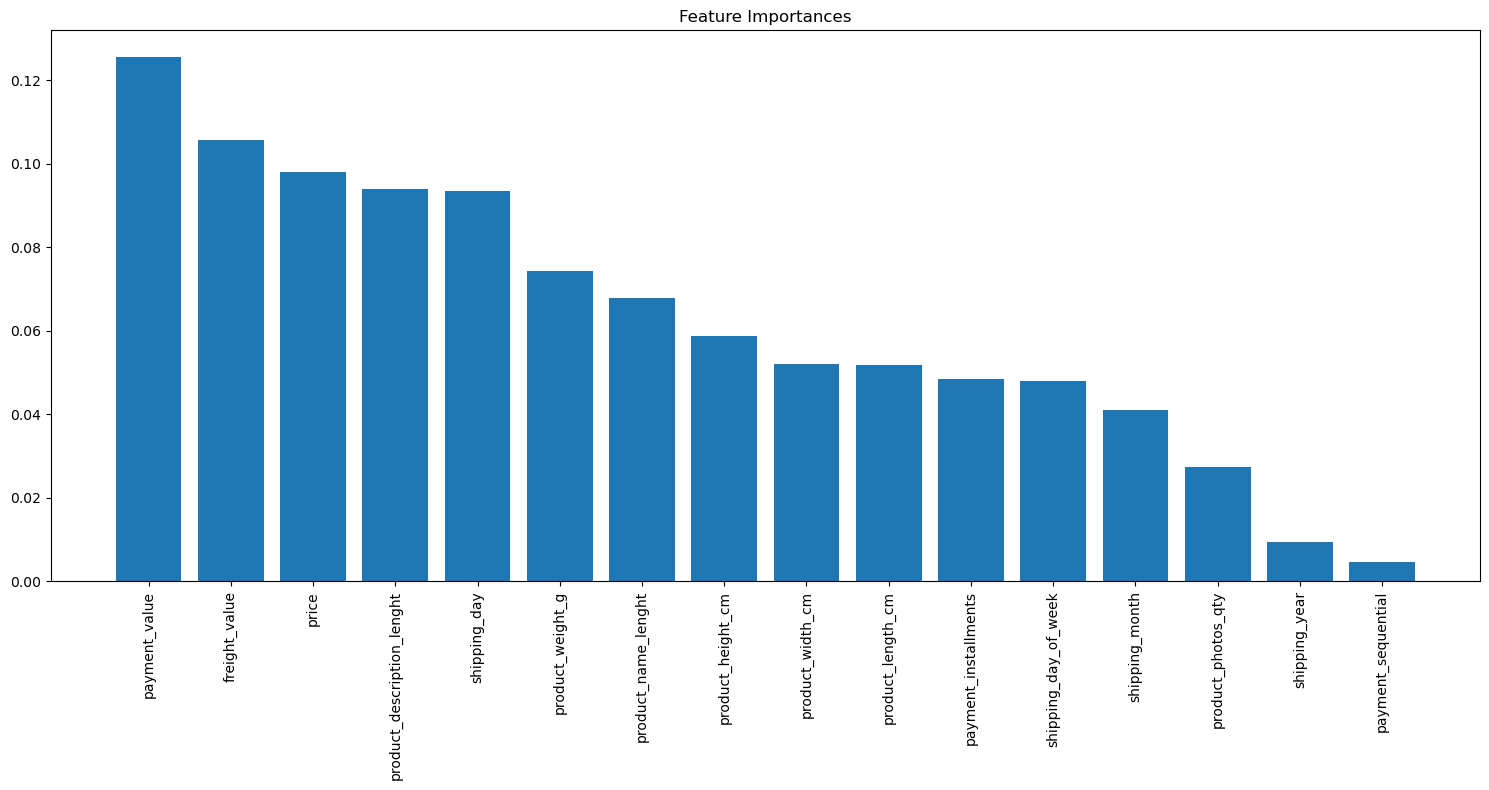

In [156]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [436]:
def normal_model_random_Prediction(model,n=1):
    indices = random.sample(range(len(X_test)), n)
    
    for idx in indices:
        sample_data = X_test.iloc[[idx]]
        sample_label = y_test.iloc[[idx]].values[0]
        
         
        prediction = model.predict(sample_data)
        
        print(f'Actual value: {sample_label}')
        print(f'Predicted value: {prediction[0]}')
        print('---')
 

In [452]:
normal_model_random_Prediction(best_rf, 5)

Actual value: 1
Predicted value: 3.974419283356147
---
Actual value: 4
Predicted value: 3.915
---
Actual value: 4
Predicted value: 4.800512906352583
---
Actual value: 5
Predicted value: 4.564857142857143
---
Actual value: 4
Predicted value: 3.002982068533768
---


## Experiments

In [15]:
from sklearn.model_selection import train_test_split

# split
train_set, test_set = train_test_split(customer_temp, test_size=0.2, random_state=42)

In [16]:
test_set['review_score'].value_counts() / len(test_set['review_score'])


5    0.565263
4    0.189343
1    0.122740
3    0.087103
2    0.035551
Name: review_score, dtype: float64

We see there is some difference between the proportion of each class compared to the original dataset.



In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(customer_temp, customer_temp['review_score']):
    strat_train_set = customer_temp.loc[train_index]
    strat_test_set = customer_temp.loc[test_index]

In [18]:
strat_train_set['review_score'].value_counts() / len(strat_train_set['review_score'])


5    0.565474
4    0.189875
1    0.125823
3    0.084055
2    0.034772
Name: review_score, dtype: float64

By doing a stratified split we keep the same proportion between classes. This split better represent the original data and will possibli reduce any bias.

In [19]:
# Assuming you have already performed the stratified shuffle split
# Checking distribution in training set
train_distribution = strat_train_set['review_score'].value_counts() / len(strat_train_set['review_score'])
print("Training Set Distribution:")
print(train_distribution)

# Checking distribution in test set
test_distribution = strat_test_set['review_score'].value_counts() / len(strat_test_set['review_score'])
print("\nTest Set Distribution:")
print(test_distribution)

# Original dataset distribution (optional)
original_distribution = customer_temp['review_score'].value_counts() / len(customer_temp['review_score'])
print("\nOriginal Dataset Distribution:")
print(original_distribution)


Training Set Distribution:
5    0.565474
4    0.189875
1    0.125823
3    0.084055
2    0.034772
Name: review_score, dtype: float64

Test Set Distribution:
5    0.565479
4    0.189862
1    0.125811
3    0.084076
2    0.034772
Name: review_score, dtype: float64

Original Dataset Distribution:
5    0.565475
4    0.189873
1    0.125821
3    0.084059
2    0.034772
Name: review_score, dtype: float64


In [348]:
corr_matrix = strat_train_set.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score                  1.000000
shipping_month                0.026305
product_photos_qty            0.021729
product_description_lenght    0.009538
shipping_day                  0.007048
payment_sequential           -0.002324
price                        -0.004037
product_name_lenght          -0.004953
shipping_year                -0.005607
shipping_day_of_week         -0.011479
product_width_cm             -0.014069
product_length_cm            -0.022953
product_height_cm            -0.030246
product_weight_g             -0.034699
freight_value                -0.039982
payment_installments         -0.042349
payment_value                -0.083150
Name: review_score, dtype: float64

<Axes: >

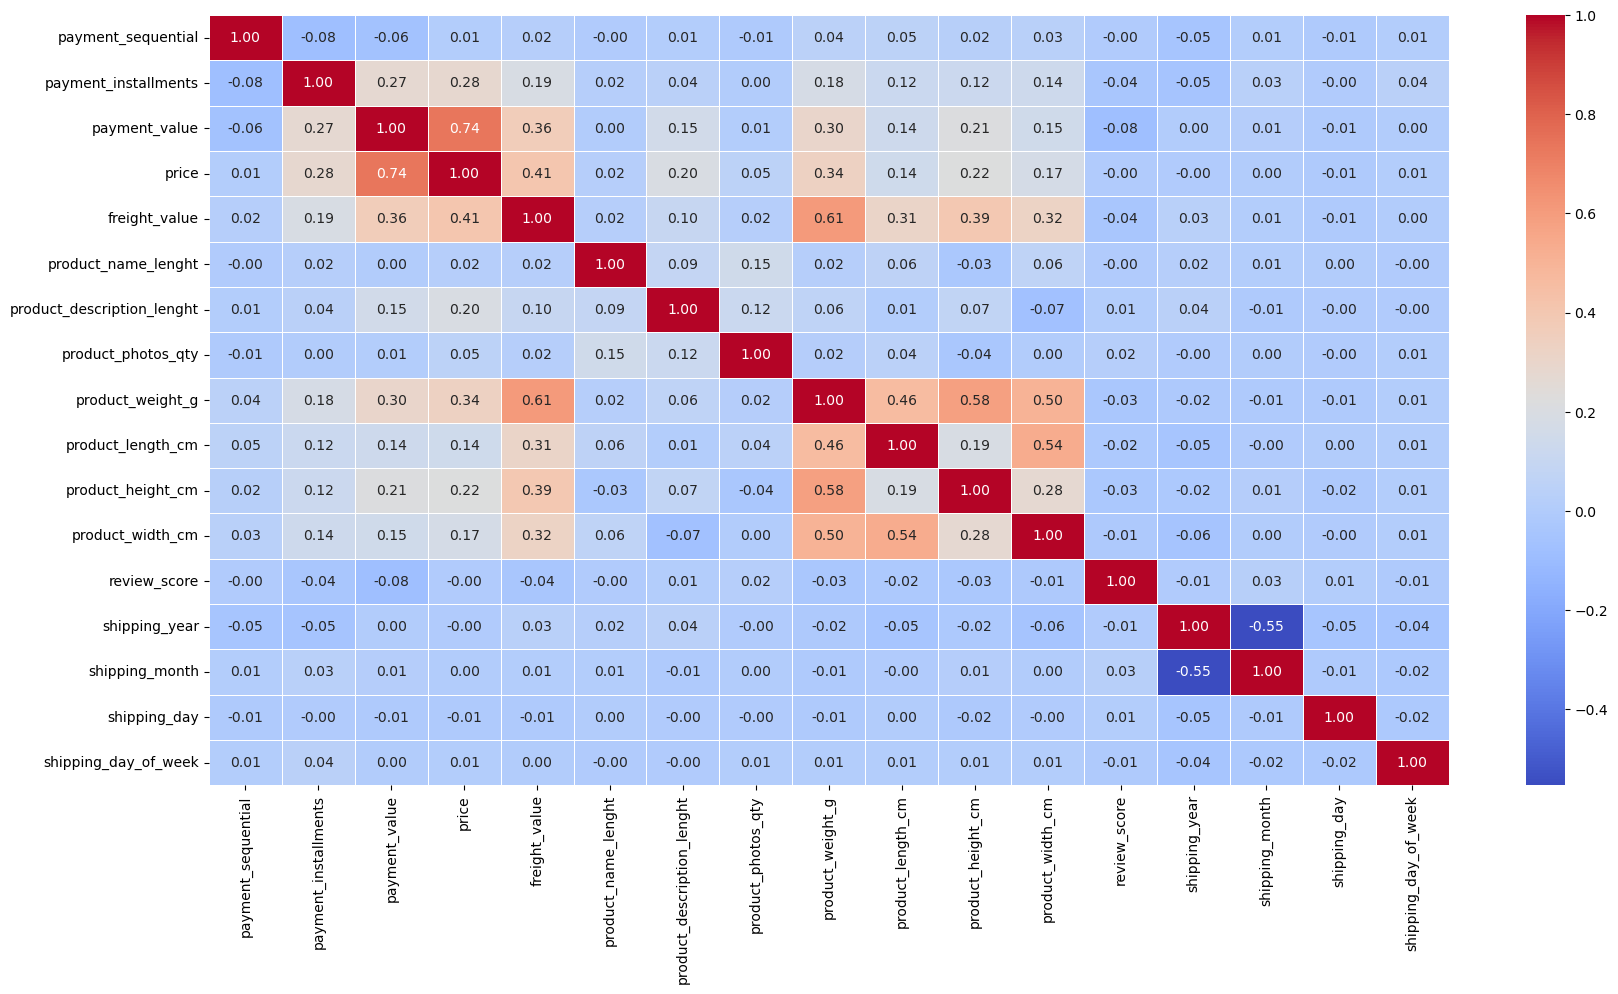

In [370]:

# increase the size of the heatmap

plt.figure(figsize=(20, 10))

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)



In [20]:
orders_features = strat_train_set.drop('review_score', axis=1)
orders_labels = strat_train_set['review_score'].copy()

In [21]:

num_attribs = customer_temp.drop('review_score', axis=1).select_dtypes(include=[np.number]).columns

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('std_scaller', StandardScaler())
                        ])

In [24]:
# lets see how the resulting data looks like
orders_features_prepared = num_pipeline.fit_transform(orders_features)
orders_features_prepared

array([[-0.12702196,  1.81744733,  0.77837476, ...,  0.58343726,
         0.34636839,  2.5858943 ],
       [-0.12702196,  1.81744733,  1.8188782 , ...,  1.20653973,
         0.80848105, -1.44122022],
       [-0.12702196,  0.37951572, -0.4415529 , ..., -1.28587014,
         0.34636839, -1.44122022],
       ...,
       [-0.12702196, -0.69893299, -0.14349708, ...,  1.51809096,
        -0.23127243, -0.77003447],
       [-0.12702196, -0.69893299, -0.441852  , ...,  1.8296422 ,
        -0.11574426,  1.24352279],
       [-0.12702196,  1.09848152,  0.07821278, ...,  0.58343726,
         0.80848105,  0.57233704]])

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(orders_features_prepared, orders_labels)

predictions = forest_reg.predict(orders_features_prepared)
forest_mse = mean_squared_error(orders_labels, predictions)
forest_rmse = np.sqrt(forest_mse)

print("NORAMLIZED MODLE RMSE: ", forest_reg.score(orders_features_prepared, orders_labels))

NORAMLIZED MODLE RMSE:  0.8866442249988311


In [26]:
test_orders_features = strat_test_set.drop('review_score', axis=1)
test_orders_labels = strat_test_set['review_score'].copy()

In [27]:
test_orders_features_prepared = num_pipeline.transform(test_orders_features)

In [28]:
y_preds = forest_reg.predict(test_orders_features_prepared)

In [435]:
from sklearn.metrics import r2_score

# train
forest_r2=r2_score(orders_labels, predictions)

forest_rmsle=np.sqrt(mean_squared_log_error(orders_labels, predictions))

forest_rmse=mean_squared_error(orders_labels, predictions, squared=False)


# test

forest_test_r2=r2_score(test_orders_labels, y_preds)

forest_test_rmsle=np.sqrt(mean_squared_log_error(test_orders_labels, y_preds))

forest_test_rmse=mean_squared_error(test_orders_labels, y_preds, squared=False)

print("TRAINING DATA SCORE")
print("-------------------")
print("NORAMLIZED MODEL R2 SCORE: ", forest_r2)

print("NORAMLIZED MODEL RMSLE: ", forest_rmsle)

print("NORAMLIZED MODEL RMSE", forest_rmse)

print("TESTING DATA SCORE")

print("-------------------")

print("NORAMLIZED MODEL R2 SCORE: ", forest_test_r2)

print("NORAMLIZED MODEL RMSLE: ", forest_test_rmsle)

print("NORAMLIZED MODEL RMSE", forest_test_rmse)








TRAINING DATA SCORE
-------------------
NORAMLIZED MODEL R2 SCORE:  0.8867939059011146
NORAMLIZED MODEL RMSLE:  0.14643720977182284
NORAMLIZED MODEL RMSE 0.46619516572303066
TESTING DATA SCORE
-------------------
NORAMLIZED MODEL R2 SCORE:  0.2372111623874229
NORAMLIZED MODEL RMSLE:  0.3181124418619767
NORAMLIZED MODEL RMSE 1.210110904680301


/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [402]:
from sklearn.metrics import r2_score

forest_r2=r2_score(orders_labels, predictions)

forest_rmsle=np.sqrt(mean_squared_log_error(orders_labels, predictions))

forest_rmse=mean_squared_error(orders_labels, predictions, squared=False)

print("NORAMLIZED MODEL R2 SCORE: ", forest_r2)

print("NORAMLIZED MODEL RMSLE: ", forest_rmsle)

print("NORAMLIZED MODEL RMSE", forest_rmse)




NORAMLIZED MODEL R2 SCORE:  0.8867939059011146
NORAMLIZED MODEL RMSLE:  0.14643720977182284
NORAMLIZED MODEL RMSE 0.46619516572303066


/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [262]:
best_rf.fit(orders_features_prepared, orders_labels)

predictions = best_rf.predict(orders_features_prepared)

forest_mse = mean_squared_error(orders_labels, predictions)

forest_rmse = np.sqrt(forest_mse)

forest_rmse

0.5297671335682077

In [331]:
import random

def random_test(model, X_test, y_test, pipeline, n=1):
    """
    Tests the model on a random sample from the test set.

    Parameters:
    - model: Trained model to make predictions.
    - X_test: Test features.
    - y_test: Test labels.
    - pipeline: Preprocessing pipeline to apply to the sample data.
    - n: Number of samples to test. Default is 1.

    Returns:
    None. Prints the actual and predicted values.
    """
    indices = random.sample(range(len(X_test)), n)
    
    for idx in indices:
        sample_data = X_test.iloc[[idx]]
        sample_label = y_test.iloc[[idx]].values[0]
        
        sample_data_prepared = pipeline.transform(sample_data)
        
        prediction = model.predict(sample_data_prepared)
        
        print(f'Actual value: {sample_label}')
        print(f'Predicted value: {prediction[0]}')
        print('---')

In [484]:
print("NEW MODEL RANDOM TEST")
random_test(forest_reg, X_test, y_test, num_pipeline,3)
print("====================================")
print("OLD MODEL RANDOM TEST")
normal_model_random_Prediction(best_rf, 3)

NEW MODEL RANDOM TEST
Actual value: 3
Predicted value: 3.22
---
Actual value: 1
Predicted value: 1.75
---
Actual value: 5
Predicted value: 4.87
---
OLD MODEL RANDOM TEST
Actual value: 5
Predicted value: 4.693862416273342
---
Actual value: 1
Predicted value: 4.527731078716746
---
Actual value: 3
Predicted value: 4.104283268085097
---


In [374]:
random_test(best_rf, X_test, y_test, num_pipeline,2)


Actual value: 4
Predicted value: 4.216334046343515
---
Actual value: 5
Predicted value: 4.64906761016674
---


In [100]:
from joblib import dump
from datetime import datetime

def save_model(model, prefix):
    """
    Save the trained model to disk with a timestamp appended to the filename.

    Parameters:
    - model: Trained model object.
    - prefix: Prefix string to use in the filename for saving.

    Returns:
    None. Saves the model to disk.
    """
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'../saved_model/{prefix}_model_{timestamp}.joblib'
    dump(model, filename)
    print(f'Model saved as {filename}')



In [338]:

# Example usage:
save_model(forest_reg, 'random_forest')

Model saved as ../saved_model/random_forest_model_20240623_160840.joblib


In [339]:
save_model(best_rf,'tuned_random_forest')

Model saved as ../saved_model/tuned_random_forest_model_20240623_160844.joblib


In [140]:
from joblib import load

def load_model(model_path):
    """
    Load a saved model from disk.

    Parameters:
    - model_path: Path to the saved model file.

    Returns:
    - Loaded model object.
    """
    try:
        model = load(model_path)
        print(f'Model loaded from {model_path}')
        return model
    except FileNotFoundError:
        print(f'Error: Model file not found at {model_path}')
        return None
    except Exception as e:
        print(f'Error loading model from {model_path}: {e}')
        return None

# Example usage:
loaded_model = load_model('../saved_model/tuned_random_forest_model_20240623_160844.joblib')


/Users/magesh/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model loaded from ../saved_model/tuned_random_forest_model_20240623_160844.joblib


/Users/magesh/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_evaluation_report(model, X_test, y_test):
    predictions = model.predict(X_test)

    y_preds_rounded = np.round(predictions)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    print("Regression Model Evaluation Report")
    print("----------------------------------")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2 ): {r2:.4f}")

# Example usag

regression_evaluation_report(forest_reg, test_orders_features_prepared, test_orders_labels)

Regression Model Evaluation Report
----------------------------------
Mean Absolute Error (MAE): 0.9254
Mean Squared Error (MSE): 1.4621
Root Mean Squared Error (RMSE): 1.2092
R-squared (R2 ): 0.2384


In [52]:
test_orders_labels.value_counts() / len(test_orders_labels)



5    0.565474
4    0.189875
1    0.125823
3    0.084055
2    0.034772
Name: review_score, dtype: float64

In [53]:
orders_labels.value_counts() / len(orders_labels)

5    0.565474
4    0.189875
1    0.125823
3    0.084055
2    0.034772
Name: review_score, dtype: float64

In [38]:
random_test(loaded_model, X_test, y_test, num_pipeline,5)

NameError: name 'random_test' is not defined

## Plot the results

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def plot_residuals(model, X_test, y_test):
    predictions = model.predict(X_test)
    residuals = y_test - predictions

    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals)
    plt.hlines(y=0, xmin=np.min(predictions), xmax=np.max(predictions), colors='r')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.show()

def plot_prediction_rate(model, X_test, y_test):
    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction Rate Plot')
    plt.show()
from sklearn.model_selection import validation_curve

def plot_validation_curve(model, X, y, param_name, param_range, scoring='neg_mean_squared_error'):
    train_scores, test_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores_mean, label='Training score', color='r')
    plt.plot(param_range, test_scores_mean, label='Cross-validation score', color='b')
    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()


from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='b')
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()


    

In [ ]:
# Assuming you have a trained model called 'model', and X_test, y_test are your test data

# Plot residuals
plot_residuals(loaded_model, X_test[:1000], y_test[:1000])

# Plot prediction rate
plot_prediction_rate(loaded_model, X_test[:1000], y_test[:1000])

# Plot validation curve (example for RandomForest max_depth parameter)
param_range = np.arange(1, 21)
plot_validation_curve(loaded_model, X_train[:1000], y_train[:1000], param_name='max_depth', param_range=param_range)

# Plot learning curve
plot_learning_curve(loaded_model, X_train[:1000], y_train[:1000])


# RE_TRAINING THE MODEL

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess_data(filepath):
    print("📥 Loading the dataset...")
    df = pd.read_csv(filepath)
    
    print("🧹 Handling missing values...")
    df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace=True)
    df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace=True)
    df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace=True)
    df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace=True)
    df.drop(columns=['review_comment_message'], inplace=True)
    df=df.select_dtypes(exclude=['object'])

    
    print("🔄 Encoding categorical variables...")
    categorical_features = df.select_dtypes(include=['object']).columns
    numerical_features = df.select_dtypes(include=['number']).columns
    numerical_features = numerical_features.drop('review_score')  # Exclude the target column
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    return df, preprocessor
filepath = '/Volumes/Project-2/programming/machine_deep_learning/projects/customer_satisfaction/data/olist_customers_dataset.csv'
print("📂 Loading and preprocessing data...")
df, preprocessor = load_and_preprocess_data(filepath)

preprocessor

📂 Loading and preprocessing data...
📥 Loading the dataset...
🧹 Handling missing values...
🔄 Encoding categorical variables...


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['payment_sequential', 'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index([], dtype='object'))])

In [109]:

def train_and_evaluate_model(X_train, y_train, X_test, y_test, preprocessor):
    print("🚀 Training the model with the best parameters...")
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])
    
    model_pipeline.fit(X_train, y_train)
    
    print("🔍 Making predictions...")
    train_predictions = model_pipeline.predict(X_train)
    test_predictions = model_pipeline.predict(X_test)

    print(test_predictions[0:8], y_test[0:8])
    
    print("📊 Calculating RMSE and R2 score...")
    train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
    test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    return model_pipeline, train_rmse, test_rmse, train_r2, test_r2

In [ ]:
filepath = '/Volumes/Project-2/programming/machine_deep_learning/projects/customer_satisfaction/data/olist_customers_dataset.csv'
print("📂 Loading and preprocessing data...")
df, preprocessor = load_and_preprocess_data(filepath)

print("🏋️‍♂️ Training model...")
X = df.drop(columns=['review_score'])
y = df['review_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("📊 X_train shape: ", X_train.shape)
print("📊 X_test shape: ", X_test.shape)

model, train_rmse, test_rmse, train_r2, test_r2 = train_and_evaluate_model(X_train, y_train, X_test, y_test, preprocessor)

print(f'🏋️‍♂️ Training RMSE: {train_rmse}')
print(f'🧪 Test RMSE: {test_rmse}')
print(f'🏋️‍♂️ Training R2: {train_r2}')
print(f'🧪 Test R2: {test_r2}')



📂 Loading and preprocessing data...
📥 Loading the dataset...
🧹 Handling missing values...
🔄 Encoding categorical variables...
🏋️‍♂️ Training model...
📊 X_train shape:  (92487, 14)
📊 X_test shape:  (23122, 14)


,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
590,1,3,32.44,13272,1,25.00,7.44,46.0,157.0,4.0,250.0,24.0,5.0,11.0
35804,1,1,164.63,26600,1,119.99,44.64,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
14286,1,1,228.34,45834,1,199.99,28.35,51.0,572.0,2.0,550.0,33.0,27.0,26.0
93508,1,10,101.25,18150,1,84.90,16.35,55.0,1392.0,1.0,900.0,16.0,16.0,16.0
14957,1,2,129.64,1531,1,119.99,9.65,51.0,1624.0,3.0,850.0,20.0,9.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,1,1,103.49,65390,1,67.70,35.79,54.0,1497.0,7.0,700.0,22.0,6.0,11.0
110268,1,1,71.59,89874,1,55.99,15.60,61.0,3416.0,2.0,1200.0,25.0,18.0,18.0
103694,2,1,53.12,3054,1,49.00,7.39,59.0,93.0,7.0,250.0,16.0,2.0,11.0
860,1,2,63.42,13309,1,45.00,18.42,57.0,1058.0,2.0,200.0,23.0,7.0,15.0


Regression Model Evaluation Report
----------------------------------
Root Mean Squared Error (RMSE): 1.3373
R-squared (R2): 0.0576


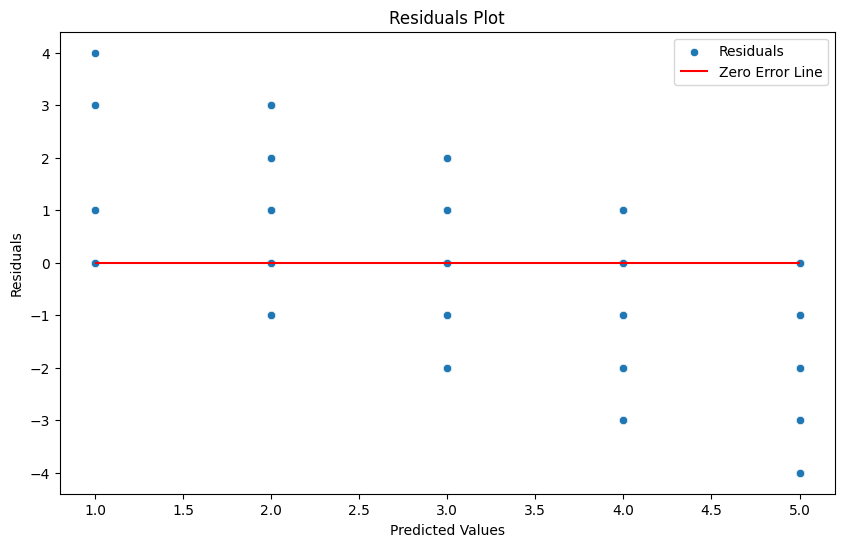

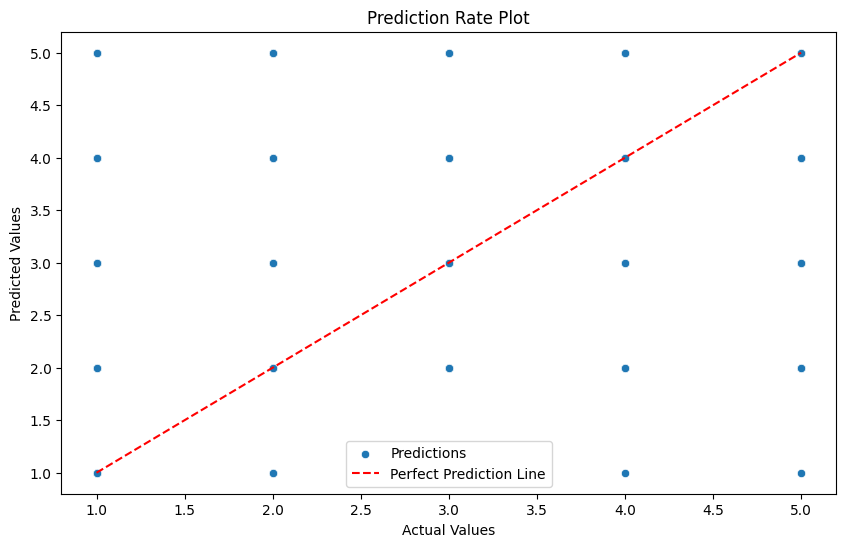

KeyboardInterrupt: 

In [108]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

def plot_evaluation_results_with_seaborn(model, X_test, y_test):
    # Make predictions
    y_pred_continuous = model.predict(X_test)

    # Round the continuous predictions to the nearest integer
    y_pred_rounded = y_pred_continuous.round().astype(int)

    # Ensure the predictions are within the valid range of review scores
    y_pred_rounded = y_pred_rounded.clip(1, 5)

    # Calculate evaluation metrics
    rmse = mean_squared_error(y_test, y_pred_rounded, squared=False)
    r2 = r2_score(y_test, y_pred_rounded)

    # Print evaluation metrics
    print("Regression Model Evaluation Report")
    print("----------------------------------")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Plot residuals
    residuals = y_test - y_pred_rounded
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred_rounded, y=residuals, label='Residuals')
    plt.hlines(y=0, xmin=np.min(y_pred_rounded), xmax=np.max(y_pred_rounded), colors='r', label='Zero Error Line')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.legend()
    plt.show()

    # Plot prediction rate
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred_rounded, label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction Rate Plot')
    plt.legend()
    plt.show()

def plot_learning_curve_with_seaborn(model, X, y, cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=train_sizes, y=train_scores_mean, label='Training score', color='r')
    sns.lineplot(x=train_sizes, y=test_scores_mean, label='Cross-validation score', color='b')
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

# Example usage
plot_evaluation_results_with_seaborn(model, X_test, y_test)
plot_learning_curve_with_seaborn(model, X_train, y_train)

In [118]:
from joblib import load

model=load('../saved_model/random_forest_final_model_20250103_184858.joblib')

In [134]:
# Assuming you have already trained your regression model and made predictions
y_pred_continuous = model.predict(X_test)

# Round the continuous predictions to the nearest integer
y_pred_rounded = y_pred_continuous.round().astype(int)

# Ensure the predictions are within the valid range of review scores
y_pred_rounded = y_pred_rounded.clip(1, 5)

# find the regression model evaluation report
rmse = mean_squared_error(y_test, y_pred_rounded, squared=False)
r2 = r2_score(y_test, y_pred_rounded)



print("Regression Model Evaluation Report")

print("----------------------------------")

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print(f"R-squared (R2): {r2:.4f}")
 

Regression Model Evaluation Report
----------------------------------
Root Mean Squared Error (RMSE): 1.3372
R-squared (R2): 0.0578


In [133]:
import random

def display_random_predictions(model, X_test, y_test, n=5):
    """
    Display random predictions from the test set.

    Parameters:
    - model: Trained model to make predictions.
    - X_test: Test features.
    - y_test: Test labels.
    - n: Number of random samples to display. Default is 5.

    Returns:
    None. Prints the actual and predicted values.
    """
    indices = random.sample(range(len(X_test)), n)
    
    for idx in indices:
        sample_data = X_test.iloc[[idx]]
        sample_label = y_test.iloc[[idx]].values[0]
        
        prediction = model.predict(sample_data).round().astype(int)
        
        print(f'Actual value: {sample_label}')
        print(f'Predicted value: {prediction[0]}')
        print('---')

# Example usage:
display_random_predictions(model, X_test, y_test, n=5)

Actual value: 5
Predicted value: 4
---
Actual value: 2
Predicted value: 4
---
Actual value: 4
Predicted value: 4
---
Actual value: 3
Predicted value: 4
---
Actual value: 5
Predicted value: 3
---


/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


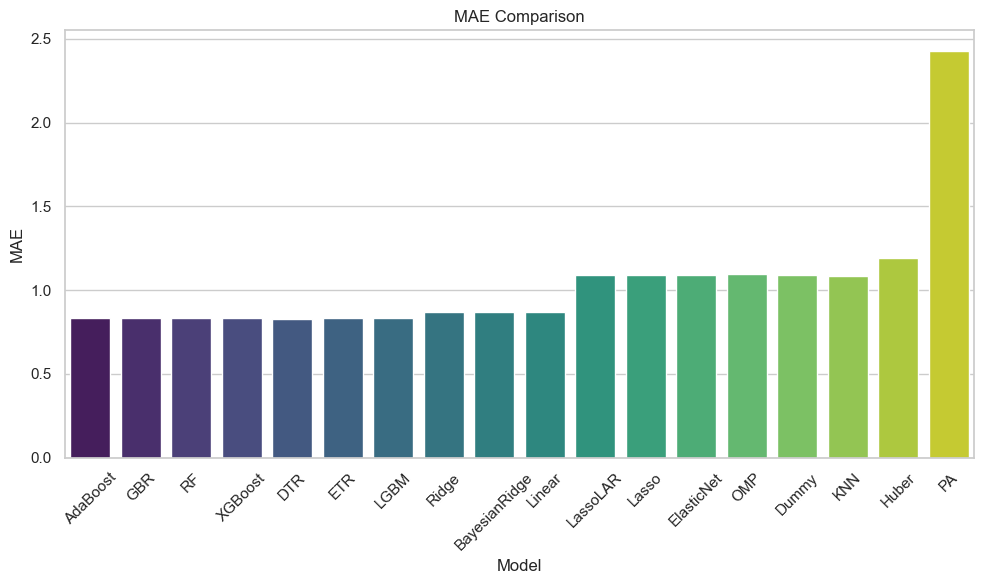

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


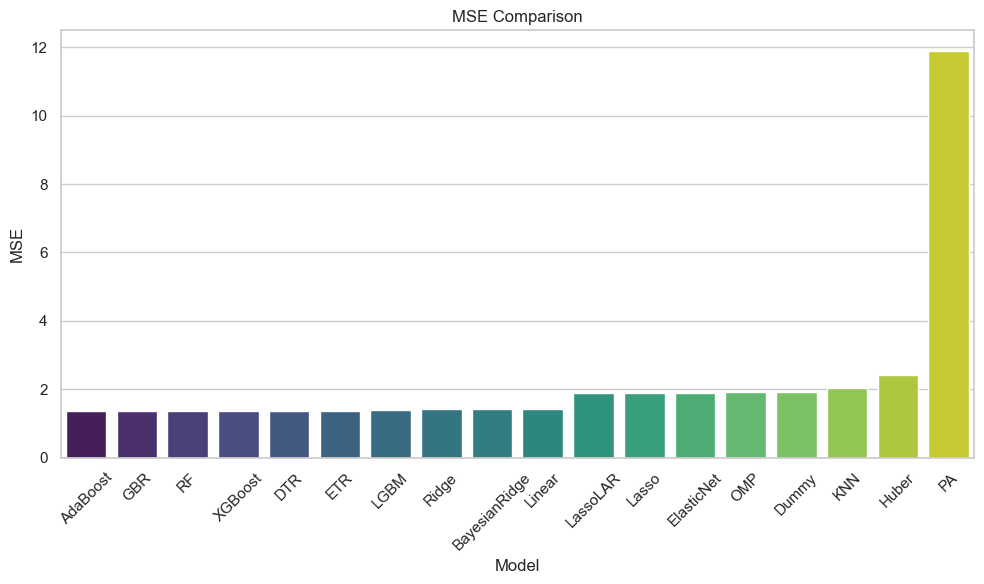

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


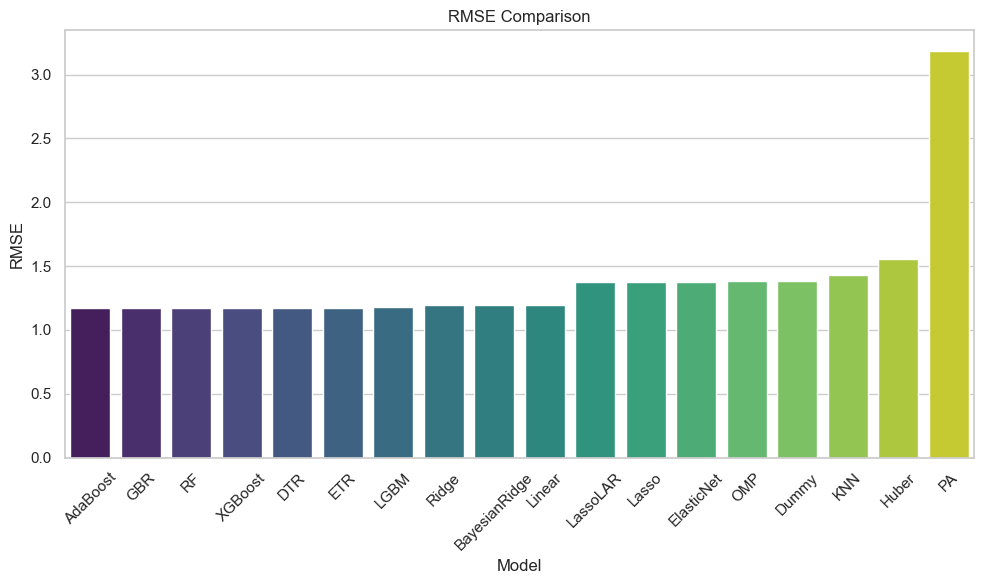

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


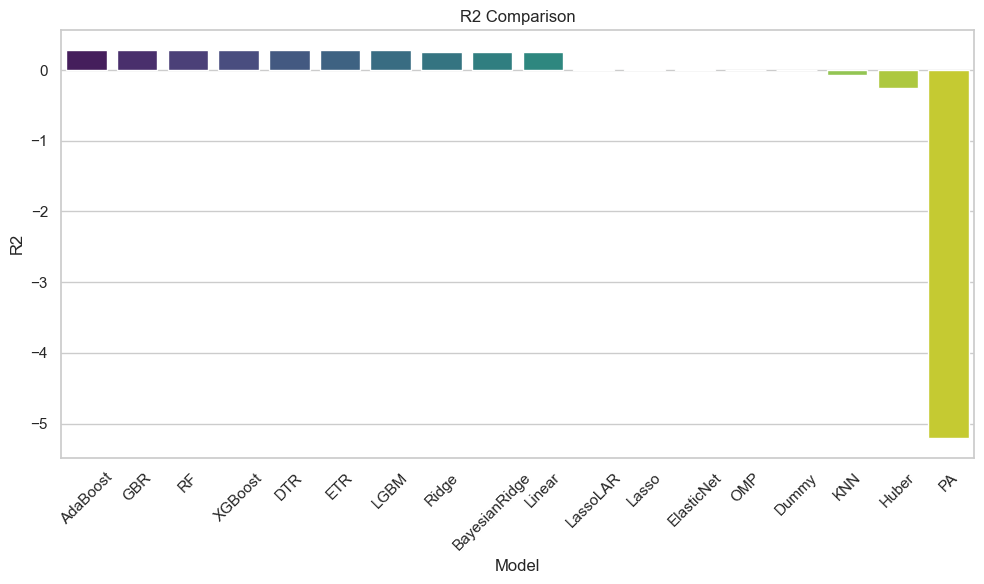

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


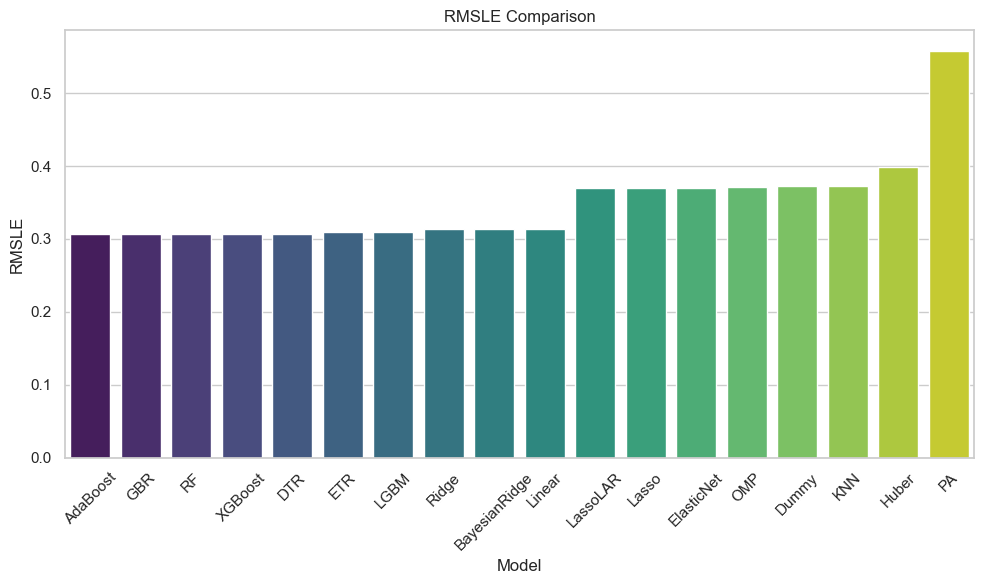

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


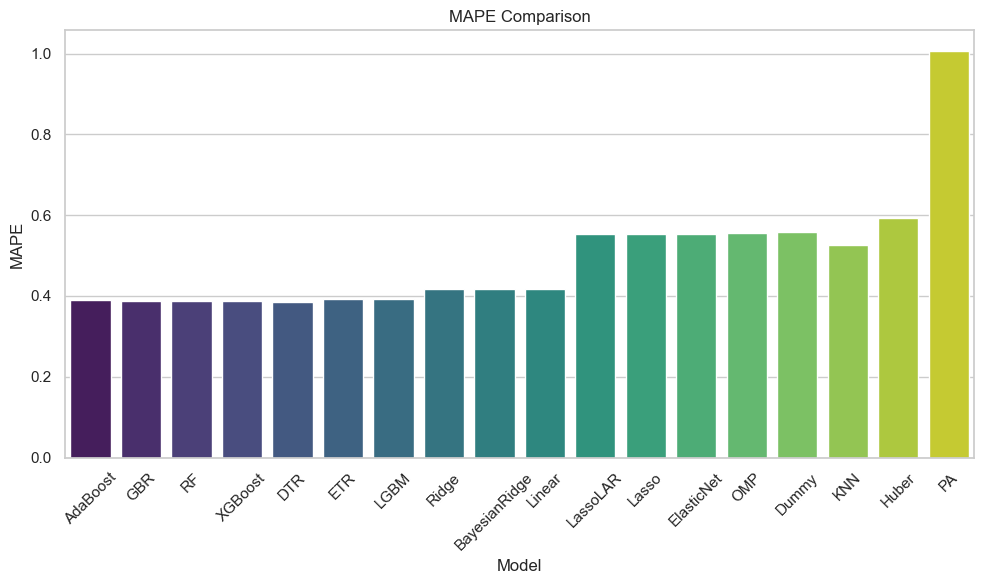

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_88359/2286548849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


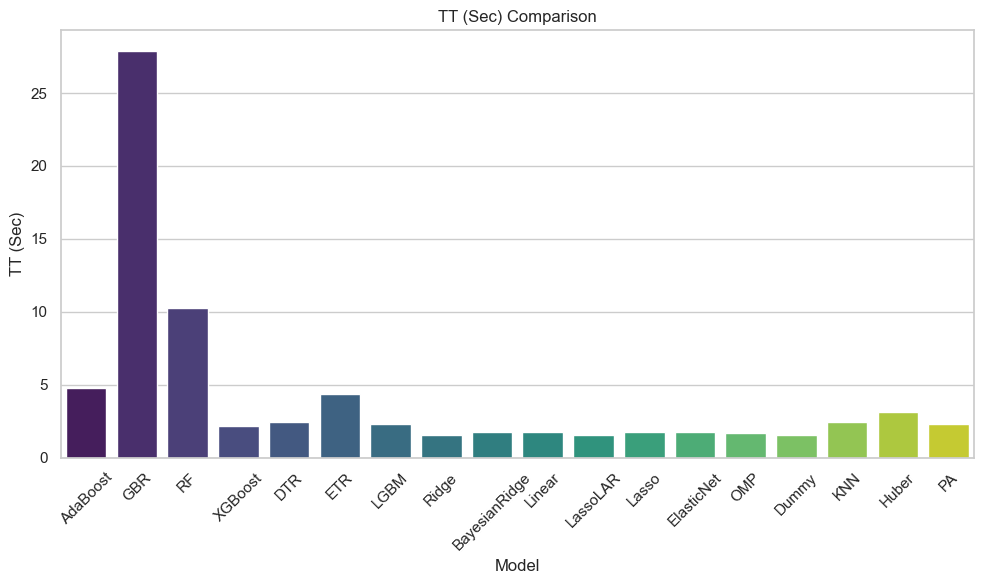

In [139]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

file_path = '/Volumes/Project-2/programming/machine_deep_learning/projects/customer_satisfaction/data/best_model.csv'
df = pd.read_csv(file_path)

# Shorten the model names
model_name_mapping = {
    'AdaBoost Regressor': 'AdaBoost',
    'Gradient Boosting Regressor': 'GBR',
    'Random Forest Regressor': 'RF',
    'Extreme Gradient Boosting': 'XGBoost',
    'Decision Tree Regressor': 'DTR',
    'Extra Trees Regressor': 'ETR',
    'Light Gradient Boosting Machine': 'LGBM',
    'Ridge Regression': 'Ridge',
    'Bayesian Ridge': 'BayesianRidge',
    'Linear Regression': 'Linear',
    'Lasso Least Angle Regression': 'LassoLAR',
    'Lasso Regression': 'Lasso',
    'Elastic Net': 'ElasticNet',
    'Orthogonal Matching Pursuit': 'OMP',
    'Dummy Regressor': 'Dummy',
    'K Neighbors Regressor': 'KNN',
    'Huber Regressor': 'Huber',
    'Passive Aggressive Regressor': 'PA'
}

df['Model'] = df['Model'].map(model_name_mapping)

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Define different plot types for each metric
plot_types = {
    'MAE': 'barplot',
    'MSE': 'barplot',
    'RMSE': 'barplot',
    'R2': 'barplot',
    'RMSLE': 'barplot',
    'MAPE': 'barplot',
    'TT (Sec)': 'barplot'
}

# Plotting the metrics
for metric, plot_type in plot_types.items():
    plt.figure(figsize=(10, 6))
    if plot_type == 'barplot':
        sns.barplot(x='Model', y=metric, data=df, palette='viridis')
    elif plot_type == 'pointplot':
        sns.pointplot(x='Model', y=metric, data=df, palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()